In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
iris = sns.load_dataset('iris')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [4]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [7]:
for column in iris.columns:
    print(f"\nUnique values in {column}: {iris[column].unique()}")


Unique values in sepal_length: [5.1 4.9 4.7 4.6 5.  5.4 4.4 4.8 4.3 5.8 5.7 5.2 5.5 4.5 5.3 7.  6.4 6.9
 6.5 6.3 6.6 5.9 6.  6.1 5.6 6.7 6.2 6.8 7.1 7.6 7.3 7.2 7.7 7.4 7.9]

Unique values in sepal_width: [3.5 3.  3.2 3.1 3.6 3.9 3.4 2.9 3.7 4.  4.4 3.8 3.3 4.1 4.2 2.3 2.8 2.4
 2.7 2.  2.2 2.5 2.6]

Unique values in petal_length: [1.4 1.3 1.5 1.7 1.6 1.1 1.2 1.  1.9 4.7 4.5 4.9 4.  4.6 3.3 3.9 3.5 4.2
 3.6 4.4 4.1 4.8 4.3 5.  3.8 3.7 5.1 3.  6.  5.9 5.6 5.8 6.6 6.3 6.1 5.3
 5.5 6.7 6.9 5.7 6.4 5.4 5.2]

Unique values in petal_width: [0.2 0.4 0.3 0.1 0.5 0.6 1.4 1.5 1.3 1.6 1.  1.1 1.8 1.2 1.7 2.5 1.9 2.1
 2.2 2.  2.4 2.3]

Unique values in species: ['setosa' 'versicolor' 'virginica']


Text(0.5, 0.98, 'Histograms of Iris Dataset Features')

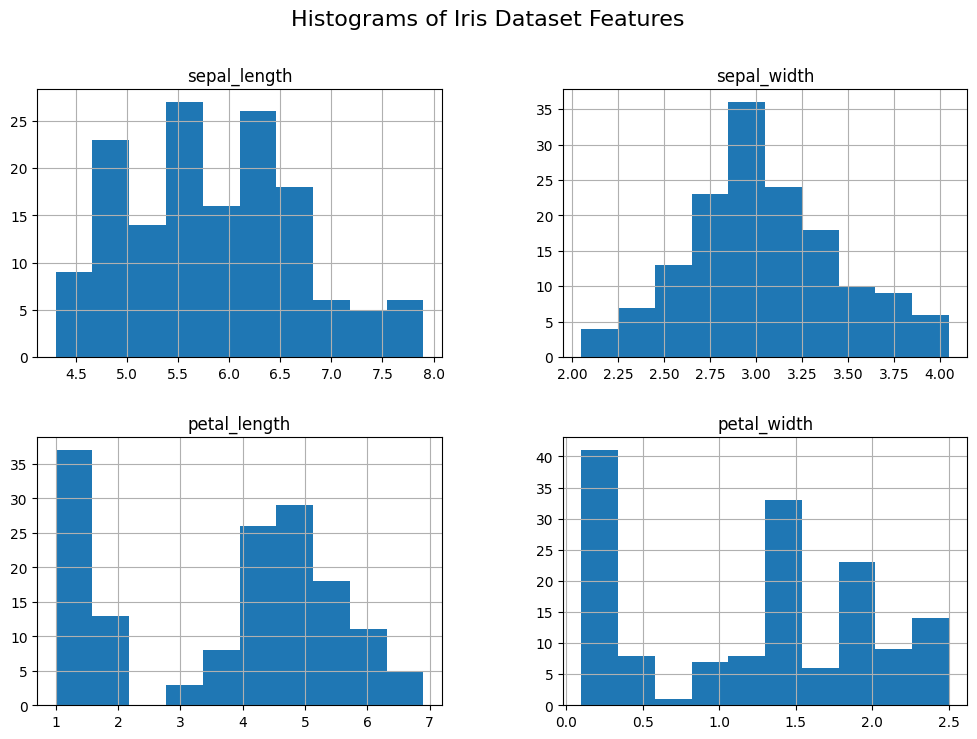

In [17]:
iris.hist(figsize=(12, 8))
plt.suptitle("Histograms of Iris Dataset Features", fontsize=16) 

Text(0.5, 1.0, 'Sepal Length vs Sepal Width')

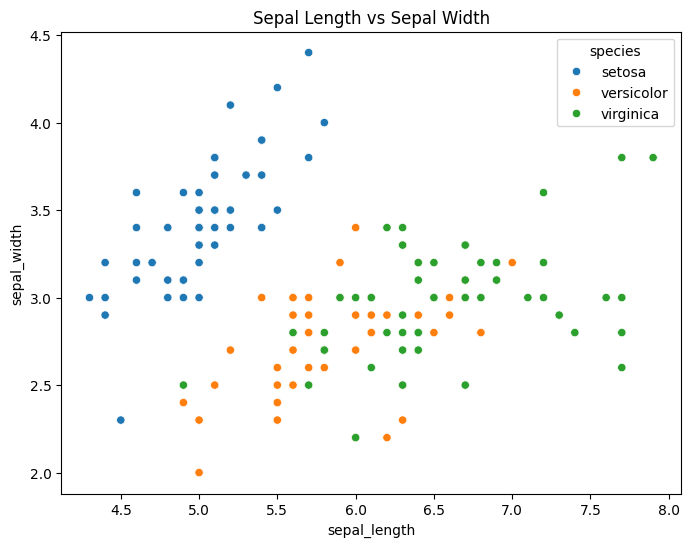

In [9]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='sepal_length', y='sepal_width', data=iris, hue='species')
plt.title('Sepal Length vs Sepal Width')

Text(0.5, 0.98, 'Pairplot of Iris Dataset Features')

<Figure size 200x300 with 0 Axes>

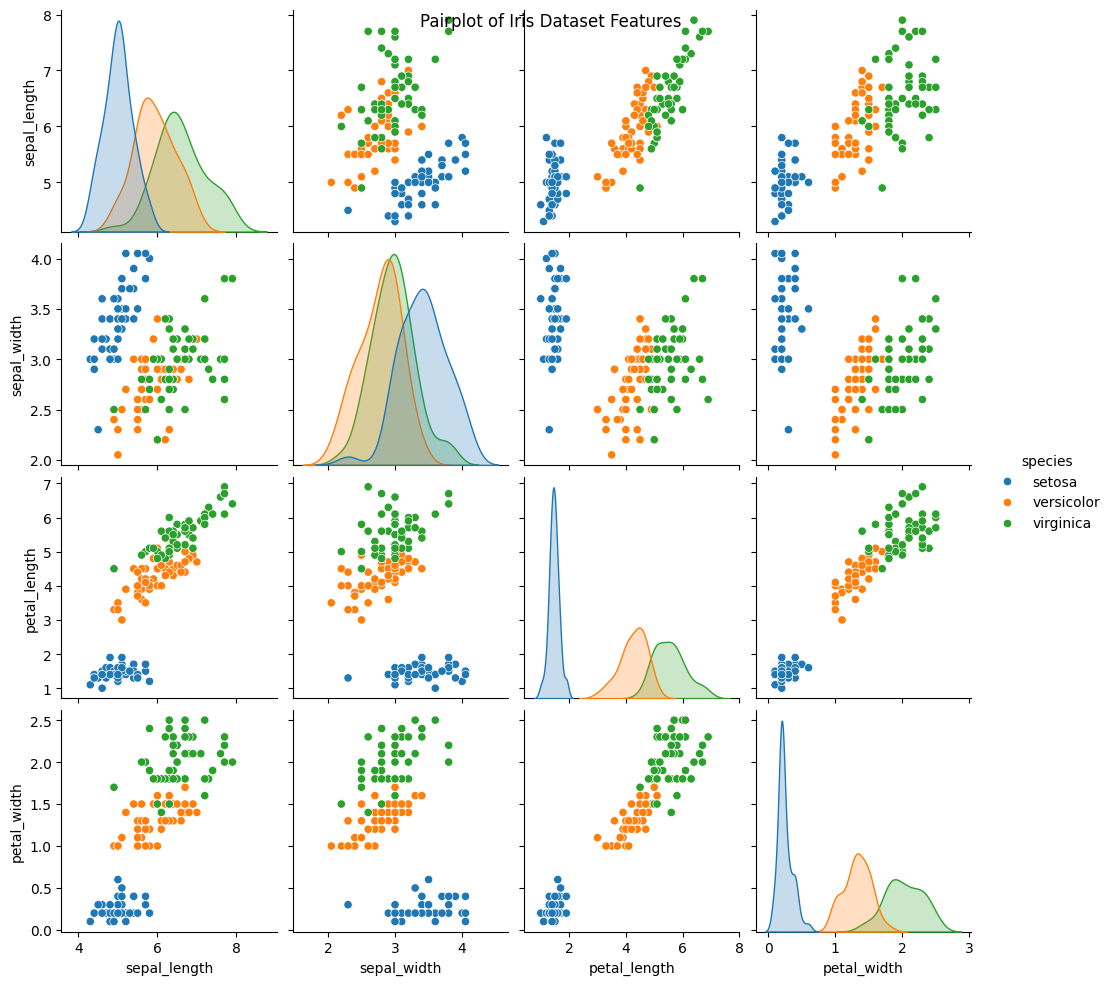

In [24]:
plt.figure(figsize=(2,3))
sns.pairplot(iris, hue='species')
plt.suptitle("Pairplot of Iris Dataset Features", fontsize=12)

In [11]:
correlation_matrix=iris.corr(numeric_only=True)

Text(0.5, 1.0, 'Correlation Heatmap')

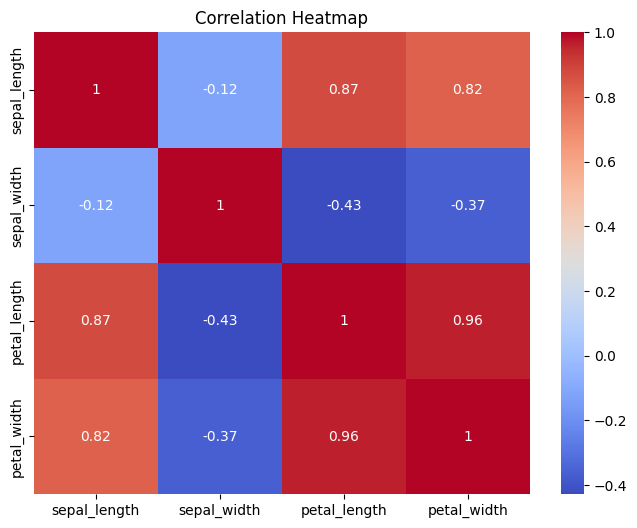

In [12]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')

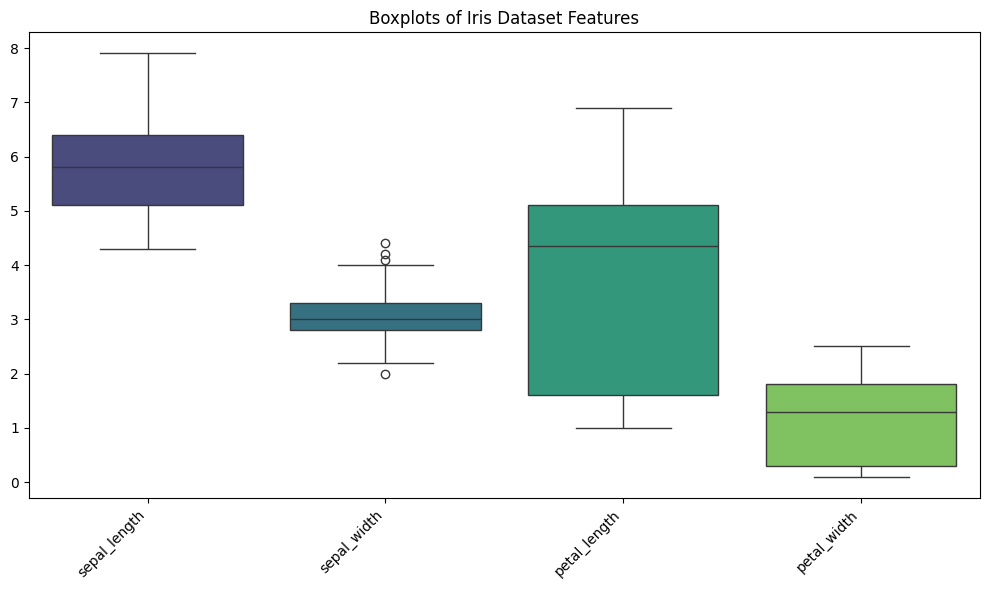

In [13]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=iris, palette='viridis') 
plt.title('Boxplots of Iris Dataset Features')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()

In [14]:
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = np.clip(df[column], lower_bound, upper_bound) # Clip outliers to bounds
    return df

In [15]:
iris = handle_outliers(iris, 'sepal_width')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


([0, 1, 2, 3],
 [Text(0, 0, 'sepal_length'),
  Text(1, 0, 'sepal_width'),
  Text(2, 0, 'petal_length'),
  Text(3, 0, 'petal_width')])

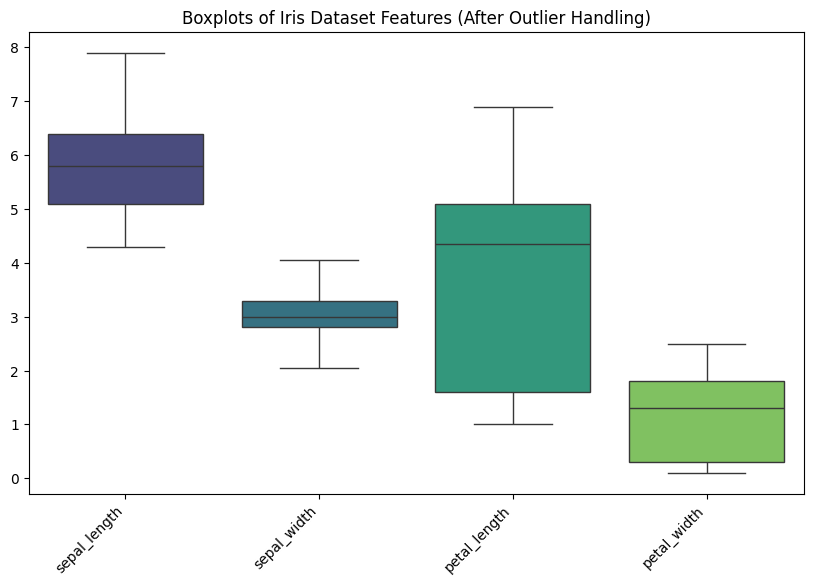

In [16]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=iris, palette='viridis')
plt.title('Boxplots of Iris Dataset Features (After Outlier Handling)')
plt.xticks(rotation=45, ha='right') 